En esta libreta haremos un análisis exploratorio de los datos (EDA por sus siglas en inglés) con la intención de conocer la mayor cantidad posible de información contenida en el conjunto de datos provisto.

Un checklist básico y clasico que podriamos seguir sería:

- estadisticas descriptivas,
- nulos, vacios, tamaño, etc

In [1]:
import pandas as pd

In [2]:
calendar = pd.read_csv('../data/calendar.csv')
test_weights = pd.read_csv('../data/test_weights.csv')
inventory = pd.read_csv('../data/inventory.csv')
sales_train = pd.read_csv('../data/sales_train.csv')
sales_test = pd.read_csv('../data/sales_test.csv')
solution = pd.read_csv('../data/solution.csv')

In [3]:
calendar

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse
0,2022-03-16,NaN,0,0,0,0,Frankfurt_1
1,2020-03-22,NaN,0,0,0,0,Frankfurt_1
2,2018-02-07,NaN,0,0,0,0,Frankfurt_1
3,2018-08-10,NaN,0,0,0,0,Frankfurt_1
4,2017-10-26,NaN,0,0,0,0,Prague_2
...,...,...,...,...,...,...,...
23011,2019-04-20,NaN,1,0,0,0,Munich_1
23012,2018-03-31,NaN,1,0,0,0,Munich_1
23013,2017-04-15,NaN,1,0,0,0,Munich_1
23014,2023-04-08,NaN,1,0,0,1,Munich_1


In [4]:
calendar.shape

(23016, 7)

In [5]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23016 entries, 0 to 23015
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    23016 non-null  object
 1   holiday_name            930 non-null    object
 2   holiday                 23016 non-null  int64 
 3   shops_closed            23016 non-null  int64 
 4   winter_school_holidays  23016 non-null  int64 
 5   school_holidays         23016 non-null  int64 
 6   warehouse               23016 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.2+ MB


In [6]:
calendar["date"] = pd.to_datetime(calendar["date"], format="%Y-%m-%d")

In [7]:
calendar.dtypes

date                      datetime64[ns]
holiday_name                      object
holiday                            int64
shops_closed                       int64
winter_school_holidays             int64
school_holidays                    int64
warehouse                         object
dtype: object

In [8]:
calendar.isnull().sum()

date                          0
holiday_name              22086
holiday                       0
shops_closed                  0
winter_school_holidays        0
school_holidays               0
warehouse                     0
dtype: int64

In [9]:
calendar.date.min(), calendar.date.max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2024-12-31 00:00:00'))

In [10]:
calendar.holiday.sum()

np.int64(974)

In [11]:
calendar.holiday_name.count()

np.int64(930)

In [12]:
# Filtrar los casos donde es holiday pero no hay nombre
missing_holiday_names = calendar[(calendar["holiday"] == 1) & (calendar["holiday_name"].isna())]

In [13]:
# Revisar cuántos son
missing_holiday_names.shape

(166, 7)

In [14]:
# Ver primeras filas
missing_holiday_names.head(5)

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse
148,2023-04-09,NaN,1,1,0,1,Frankfurt_1
463,2024-03-31,NaN,1,1,0,1,Munich_1
476,2016-03-27,NaN,1,0,0,0,Brno_1
477,2024-03-31,NaN,1,0,0,0,Prague_2
486,2020-04-11,NaN,1,0,0,0,Frankfurt_1


In [15]:
missing_holiday_names.tail(5)

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse
23011,2019-04-20,NaN,1,0,0,0,Munich_1
23012,2018-03-31,NaN,1,0,0,0,Munich_1
23013,2017-04-15,NaN,1,0,0,0,Munich_1
23014,2023-04-08,NaN,1,0,0,1,Munich_1
23015,2024-03-30,NaN,1,0,0,1,Munich_1


In [16]:
calendar.holiday_name.value_counts().head(10)

holiday_name
2nd Christmas Day                   63
Christmas Eve                       63
Labour Day                          63
New Years Day                       63
International womens day            63
1st Christmas Day                   63
Easter Monday                       42
Good Friday                         42
Den boje za svobodu a demokracii    36
Cyrila a Metodej                    36
Name: count, dtype: int64

In [17]:
calendar.holiday_name.value_counts().tail(10)

holiday_name
State Foundation Day                                           9
Memorial Day for the Martyrs of Arad                           9
Memorial Day for the Victims of the Communist Dictatorships    9
Day of National Unity                                          8
National Defense Day                                           8
Peace Festival in Augsburg                                     6
Hungary National Day Holiday                                   2
Christmas Holiday                                              1
1848 Revolution Memorial Day (Extra holiday)                   1
All Saints' Day Holiday                                        1
Name: count, dtype: int64

In [19]:
calendar.warehouse.unique()

array(['Frankfurt_1', 'Prague_2', 'Brno_1', 'Munich_1', 'Prague_3',
       'Prague_1', 'Budapest_1'], dtype=object)

In [20]:
for col in calendar.select_dtypes(include="object"):
    print(f"\nColumna: {col}")
    print("Valores únicos:", calendar[col].nunique())
    print(calendar[col].value_counts().head(5))



Columna: holiday_name
Valores únicos: 37
holiday_name
2nd Christmas Day           63
Christmas Eve               63
Labour Day                  63
New Years Day               63
International womens day    63
Name: count, dtype: int64

Columna: warehouse
Valores únicos: 7
warehouse
Frankfurt_1    3288
Prague_2       3288
Brno_1         3288
Munich_1       3288
Prague_3       3288
Name: count, dtype: int64


In [21]:
calendar["date"] = pd.to_datetime(calendar["date"])
calendar.groupby(calendar["date"].dt.year).size()
calendar.groupby(calendar["date"].dt.month).size()


date
1     1953
2     1785
3     1953
4     1890
5     1953
6     1890
7     1953
8     1953
9     1890
10    1953
11    1890
12    1953
dtype: int64

# 📊 Dictamen del dataset `calendar`

## Dimensiones
- **Filas × Columnas:** 23,016 × 7  
- **Rango de fechas:** 2016-01-01 → 2024-12-31  

## Variables
| Columna                  | Tipo    | Nulos   | % Nulos | Notas                           |
|---------------------------|---------|---------|---------|---------------------------------|
| date                     | object  | 0       | 0%      | Convertir a `datetime`          |
| holiday_name             | object  | 22,086  | 95.9%   | Solo ~930 festivos con nombre   |
| holiday                  | int64   | 0       | 0%      | Flag binario (974 días festivos)|
| shops_closed             | int64   | 0       | 0%      | Binario                         |
| winter_school_holidays   | int64   | 0       | 0%      | Binario                         |
| school_holidays          | int64   | 0       | 0%      | Binario                         |
| warehouse                | object  | 0       | 0%      | 7 valores únicos                |

## Festivos
- **Total días festivos:** 974  
- **Con nombre:** 930  
- **Sin nombre:** 44 (prob. fechas móviles, ej. Pascua)  

## Warehouses
- 7 valores únicos:  
  - Frankfurt_1  
  - Prague_1, Prague_2, Prague_3  
  - Brno_1  
  - Munich_1  
  - Budapest_1  


In [24]:
df = calendar

In [25]:
def quick_insights(df):
    """
    Genera un bloque Markdown con insights rápidos del dataset calendar.
    """
    n_rows = len(df)

    festivos = df["holiday"].sum()
    festivos_con_nombre = df["holiday_name"].notna().sum()
    festivos_sin_nombre = festivos - festivos_con_nombre

    shops_closed_pct = df["shops_closed"].mean() * 100
    school_holidays_pct = df["school_holidays"].mean() * 100
    winter_school_holidays_pct = df["winter_school_holidays"].mean() * 100

    markdown = f"""
## 🔎 Insights rápidos

- **Festivos**  
  - {festivos} días marcados como festivos → **{festivos/n_rows:.1%}** del total.  
  - {festivos_con_nombre} con nombre (**{festivos_con_nombre/festivos:.1%}** de los festivos).  
  - {festivos_sin_nombre} sin nombre (**{festivos_sin_nombre/festivos:.1%}** de los festivos).  

- **School holidays**  
  - `school_holidays`: presente en **{school_holidays_pct:.1f}%** de los días.  
  - `winter_school_holidays`: presente en **{winter_school_holidays_pct:.1f}%** de los días.  

- **Shops closed**  
  - Días con cierre de tiendas: **{shops_closed_pct:.1f}%** del total.  

- **Warehouses**  
  - {df['warehouse'].nunique()} almacenes distintos.  
  - Recomendación: revisar la distribución de registros por almacén.  

- **Calidad de datos**  
  - Nulos concentrados en `holiday_name`.  
  - Sin nulos en variables clave (`date`, `holiday`, `warehouse`).  
  - Posible redundancia entre `holiday` y `holiday_name`.  
"""
    return markdown

# Ejemplo de uso:
print(quick_insights(df))



## 🔎 Insights rápidos

- **Festivos**  
  - 974 días marcados como festivos → **4.2%** del total.  
  - 930 con nombre (**95.5%** de los festivos).  
  - 44 sin nombre (**4.5%** de los festivos).  

- **School holidays**  
  - `school_holidays`: presente en **0.7%** de los días.  
  - `winter_school_holidays`: presente en **1.1%** de los días.  

- **Shops closed**  
  - Días con cierre de tiendas: **2.7%** del total.  

- **Warehouses**  
  - 7 almacenes distintos.  
  - Recomendación: revisar la distribución de registros por almacén.  

- **Calidad de datos**  
  - Nulos concentrados en `holiday_name`.  
  - Sin nulos en variables clave (`date`, `holiday`, `warehouse`).  
  - Posible redundancia entre `holiday` y `holiday_name`.  



## archivo de train

In [26]:
sales_train = pd.read_csv('../data/sales_train.csv')

In [ ]:
sales_train

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007414,4941,2023-06-21,Prague_1,9988.0,26.56,34.06,1.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
4007415,4941,2023-06-24,Prague_1,8518.0,27.42,34.06,1.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
4007416,4941,2023-06-23,Prague_1,10424.0,33.39,34.06,1.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
4007417,4941,2023-06-22,Prague_1,10342.0,22.88,34.06,1.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0


In [28]:
sales_train.shape

(4007419, 14)

In [29]:
import seaborn as sns

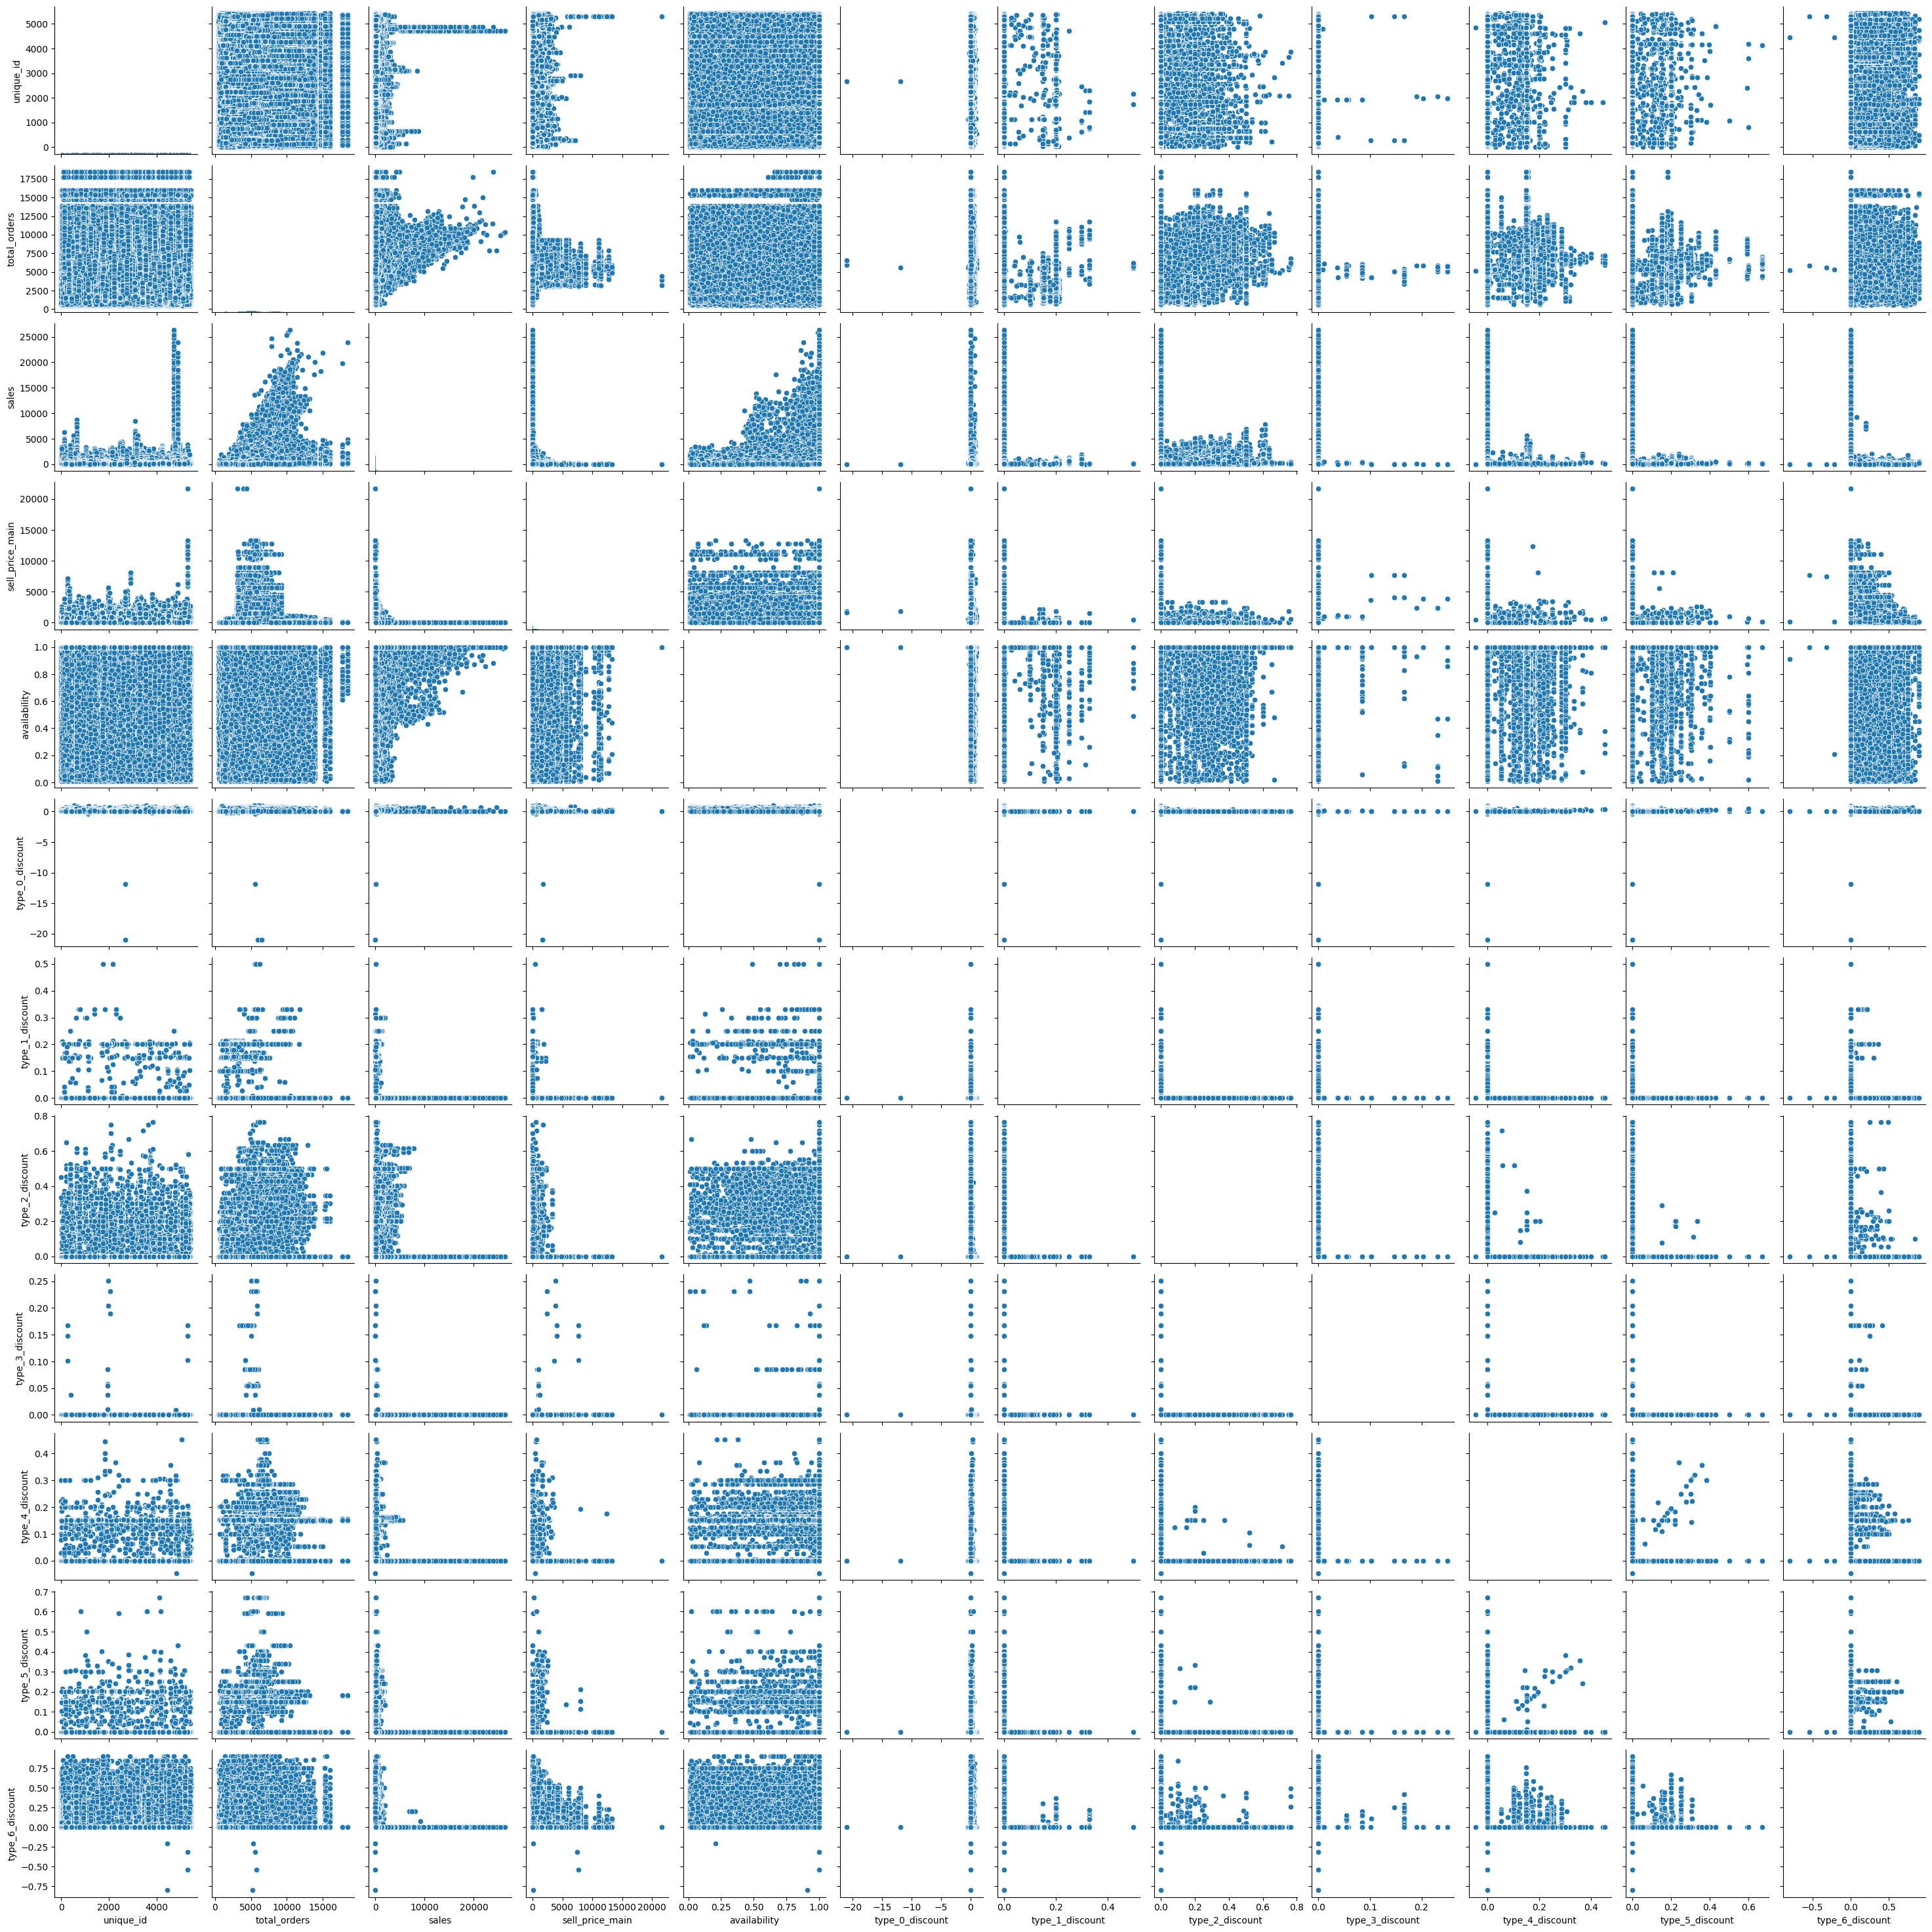

In [30]:
sns.pairplot(sales_train)